# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [250]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

mpl.style.use('ggplot')
df = pd.read_csv('./../assets/billboard.csv')

display(df.head())

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Write a brief description of your data, and any interesting observations you've made thus far. 

Artists/Tracks with data on track length, genre, dates, and their rankings 
over different weeks.
Some incomplete data and nans.


## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [251]:
# Dropped nulls down below!
# Tried replacing nulls with mean but that didn't make sense.
# Could change the track length from string to a mathable time

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [252]:
# weekly ranking data
# melt into long form
new_df = pd.melt(df.ix[:,7:], var_name = 'Week', value_name = 'Ranking')


In [253]:
new_df['genre'] = df['genre']
new_df = new_df.dropna()
#new_df['Ranking']
display(new_df.head())

,Week,Ranking,genre
0,x1st.week,78.0,Rock
1,x1st.week,15.0,Rock
2,x1st.week,71.0,Rock
3,x1st.week,41.0,Rock
4,x1st.week,57.0,Rock


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

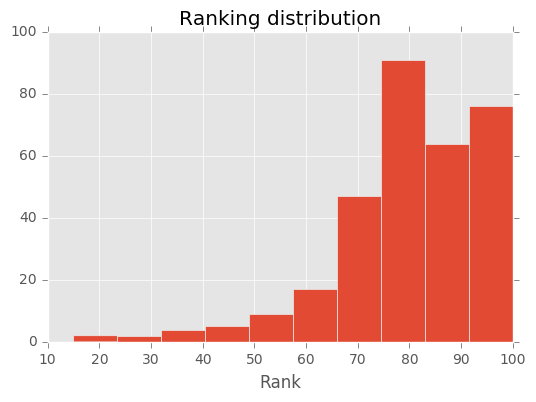

In [254]:
plt.hist(new_df['Ranking'])
plt.xlabel("Rank")
plt.title("Ranking distribution")
plt.show()

# Not a normal distribution.. In this case "better" means a lower
# number so it makes sense that there would be less of those..



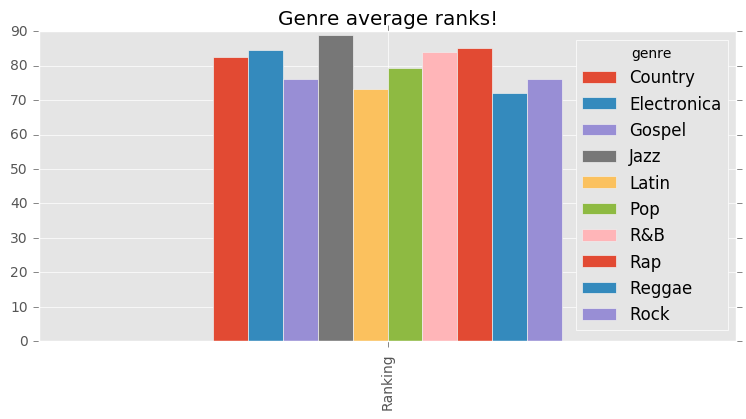

In [255]:
pivoted = pd.pivot_table(new_df[['Ranking','genre']], columns=['genre'],aggfunc=np.mean) 
pivoted
pivoted.plot(kind = 'bar', figsize = (9,4))
plt.title("Genre average ranks!")
plt.show()
# On average different genres score approximately the same.


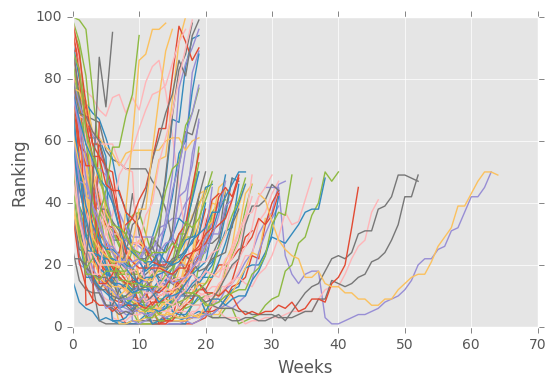

In [256]:
# I decided to plot every songs scores (Y) by the week (X)
# this lets us see that there are regular trends and outliers.
# this is a pretty regular trend, probably because songs take time 
# to get popular and then taper out. 
# I was having trouble with the melting so for this one I had to do a dict..

row_scores = {}
for idx,val in enumerate(df):  
    row_scores[idx] = [x for x in df.ix[idx,7:].values]

for key in row_scores:
    plt.plot(range(76), row_scores[key])

plt.ylabel('Ranking')
plt.xlabel('Weeks')
plt.show()

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

What is the highest contributing factor to longevity in the billboard,
with the data given?



## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- define 'longevity': Short(10), medium(20 weeks), long(35 weeks), very long (55)?
- List possible factors: genre, genre by year vs release year,
- track length, time of year.
- Graph those factors to see any sort of relationships
- Maybe June is the best month to release a song to get the best longevity, etc.

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

https://www.tumblr.com/blog/jroyalty07

Didn't do code snippets!

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 